## PREPARING THE DATA

In [42]:
# =========== IMPORT UTILS ===========
from utils.utils import *
import pickle

In [43]:

# Load dataset and sequance list

X_train=load_p("fitted_models/X_train.pkl")
y_train=load_p("fitted_models/y_train.pkl")

X_test=load_p("fitted_models/X_test.pkl")
y_test=load_p("fitted_models/y_test.pkl")

X_tiny=load_p("fitted_models/X_tiny.pkl")
y_tiny=load_p("fitted_models/y_tiny.pkl")

sequence_list = load_p("fitted_models/sequence_list.pkl")



In [44]:
# =========== CREATE DICTIONARIES WITH UNIQUE INDEX  ===========

# To store values efficiently (INTEGERS/WORDS and INTEGERS/TAGS)
# x attribute: list of words (integer words)
# y attribute: list of tags (integer tags)
# Then we need to keep a mapping from integers to words and from integers to tags.

corpus_word_dict, corpus_tag_dict = create_corpus(X_train, y_train)

In [45]:
# =========== CREATE TAGS  ===========

train_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_train]
y_train_true = [tag for array in train_tag_pos for tag in array]

test_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_test]
y_test_true = [tag for array in test_tag_pos for tag in array]

tiny_tag_pos = [[corpus_tag_dict[i] for i in tag] for tag in y_tiny]
y_tiny_true = [tag for array in tiny_tag_pos for tag in array]

## MODELS

In [46]:

# =========== MODELS - Default Features ===========
feature_mapper = IDFeatures(sequence_list)
feature_mapper.build_features()

# =========== MODELS IMPORT  ===========

structured_perceptron = StructuredPerceptron(corpus_word_dict, corpus_tag_dict, feature_mapper)
structured_perceptron.load_model(dir='fitted_models/default_features_model_wo_cython.pkl')
structured_perceptron.parameters

array([ 8.,  9., 11., ..., -2.,  2.,  0.])

In [47]:
load_predictions=True

In [48]:
datasets = ["train", "test", "tiny"]
models = ["default", "extra"]

# Genera todas las combinaciones y crea el diccionario
dic_metrics = {f"{dataset}-{model}": None for dataset in datasets for model in models}

# Muestra el diccionario generado
print(dic_metrics)

{'train-default': None, 'train-extra': None, 'test-default': None, 'test-extra': None, 'tiny-default': None, 'tiny-extra': None}


Metrics:



Confusion Matrix



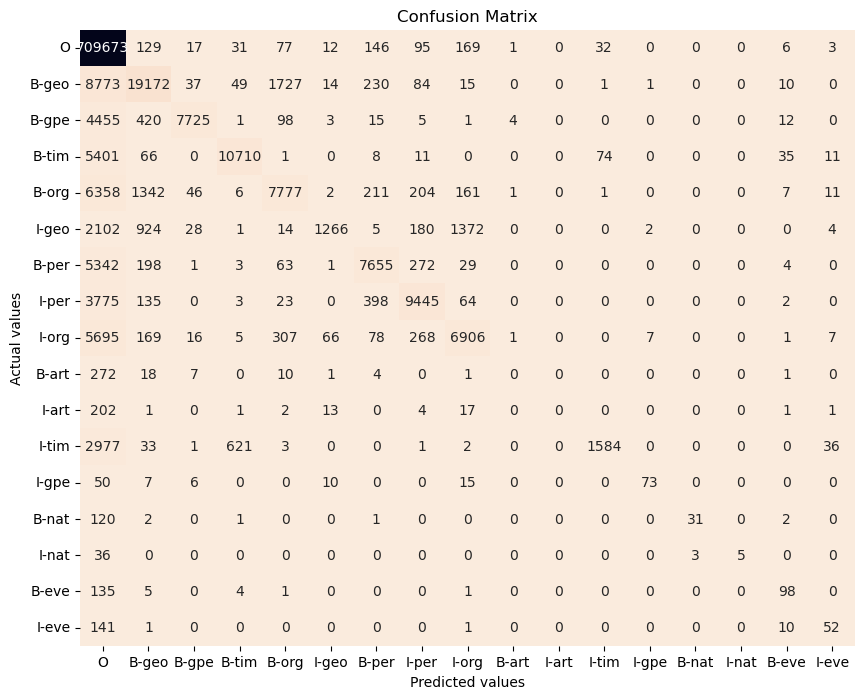


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [49]:
dic_metrics["train-default"]=evaluate(X_train,structured_perceptron,
         train_tag_pos,corpus_tag_dict ,
         y_train_true,
         "pred_train_default",load=load_predictions)

Metrics:



Confusion Matrix



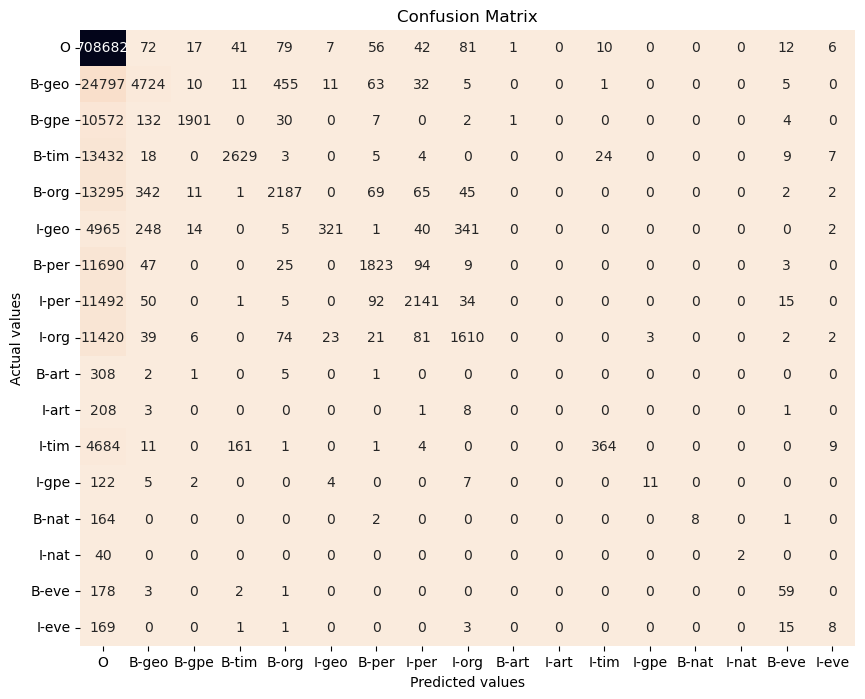


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [50]:
dic_metrics["test-default"]=evaluate(X_test,structured_perceptron,
         test_tag_pos,corpus_tag_dict ,
         y_test_true,
         "pred_test_default",load=load_predictions)

Metrics:



Confusion Matrix



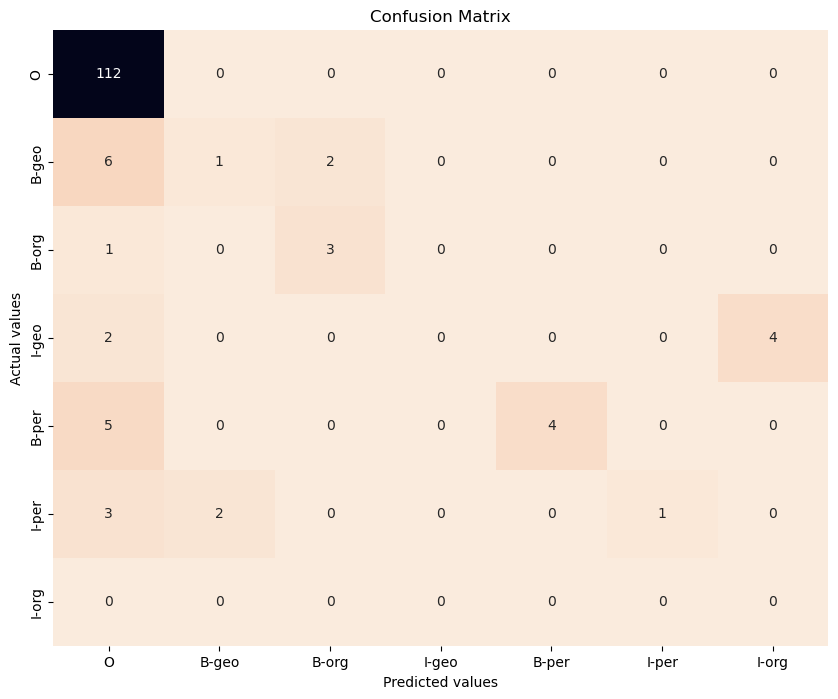


Metrics by tag



c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Nainh\.conda\envs\quora_test_env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

In [51]:


dic_metrics["tiny-default"]=evaluate(X_tiny,structured_perceptron,
         tiny_tag_pos,corpus_tag_dict ,
         y_tiny_true,
         "pred_tiny_default",load=load_predictions)

In [61]:

from skseq.sequences.sequence import Sequence
for sentence in X_tiny:
    print(structured_perceptron.viterbi_decode(
        Sequence(x=sentence, y=[int(0) for w in sentence]))[0].to_words(
        sequence_list, only_tag_translation=True),"\n")
    

    


The/O programmers/O from/O Barcelona/O might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

The/O programmers/O from/O Barchelona/O cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

Jack/B-per London/B-geo went/O to/O Parris/O ./O  

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O  

Bill/B-per gates/O and/O Steve/O jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

Bill/B-per Gates/I-per and/O Steve/O Jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

The/O president/O of/O U.S.A/O thought/O they/O could/O win/O the/O war/O ./O  

The/O president/O of/O the/O United/B-org States/I-org of/I-org America/I-org thought/O they/O could/O win/O the/O war/O ./O  

The/O king/O of/O Saudi/O Arabia/O wanted/O total/O control/O ./O  

Robin/O does/O not/O want/O to/O go/O to/O Saudi/O Arabia/O ./O  

Apple/O is/O a/O great/O company/O ./O  

I/O really/O love/O apples/O and

In [52]:
from skseq.sequences import extended_feature

extra_mapping_feature = extended_feature.ExtendedFeatures(sequence_list) 
extra_mapping_feature.build_features()

structured_perceptron_extraf = StructuredPerceptron(corpus_word_dict, corpus_tag_dict, extra_mapping_feature)
structured_perceptron_extraf.load_model(dir='fitted_models/extra_features_model_wo_cython.pkl')

Metrics:



Confusion Matrix



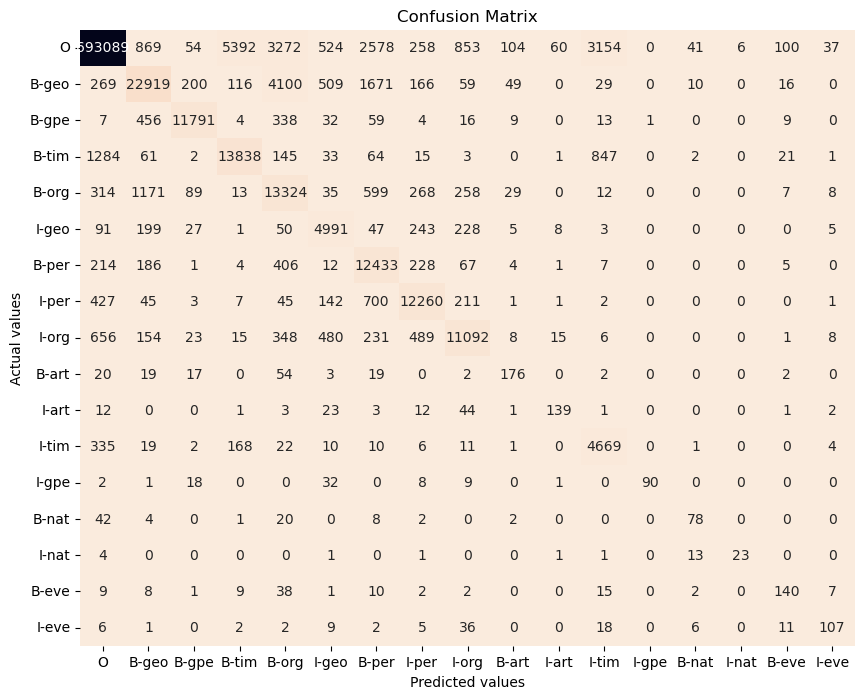


Metrics by tag



In [53]:
dic_metrics["train-extra"]=evaluate(X_train,structured_perceptron_extraf,
         train_tag_pos,corpus_tag_dict ,
         y_train_true,
         "pred_train_extra",load=load_predictions)

Metrics:



Confusion Matrix



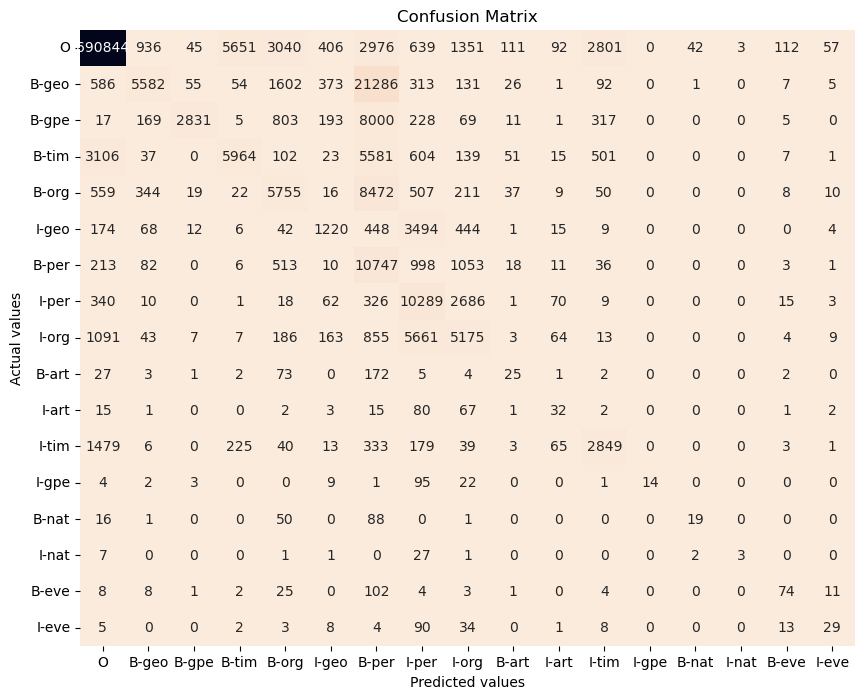


Metrics by tag



In [54]:
dic_metrics["test-extra"]=evaluate(X_test,structured_perceptron_extraf,
         test_tag_pos,corpus_tag_dict ,
         y_test_true,
         "pred_test_extra",load=load_predictions)

Metrics:



Confusion Matrix



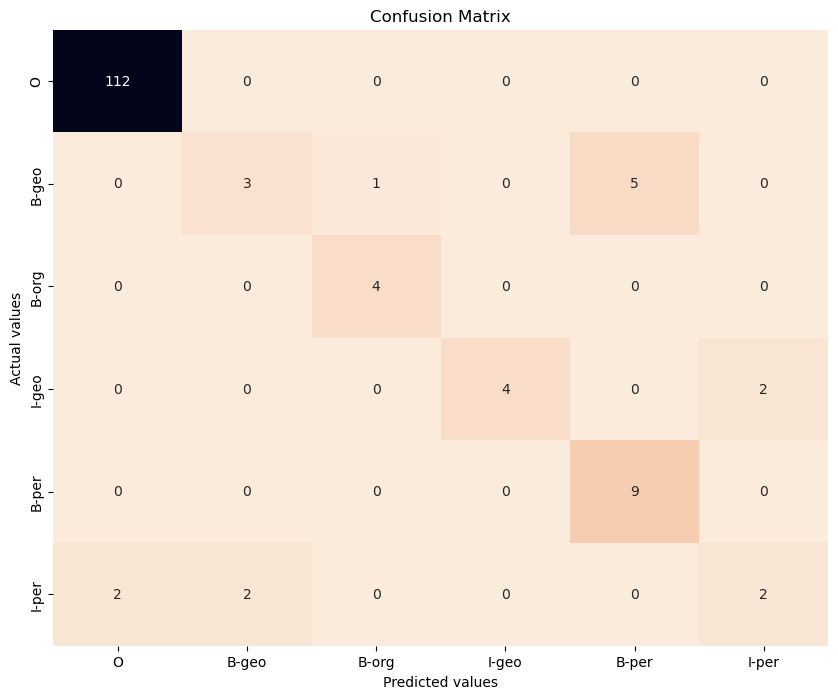


Metrics by tag



In [55]:
dic_metrics["tiny-extra"]=evaluate(X_tiny,structured_perceptron_extraf,
         tiny_tag_pos,corpus_tag_dict ,
         y_tiny_true,
         "pred_tiny_extra",load=load_predictions)

In [62]:

from skseq.sequences.sequence import Sequence
for sentence in X_tiny:
    print(structured_perceptron_extraf.viterbi_decode(
        Sequence(x=sentence, y=[int(0) for w in sentence]))[0].to_words(
        sequence_list, only_tag_translation=True),"\n")
    

    


The/O programmers/O from/O Barcelona/B-org might/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

The/O programmers/O from/O Barchelona/B-per cannot/O write/O a/O sentence/O without/O a/O spell/O checker/O ./O  

Jack/B-per London/B-geo went/O to/O Parris/B-per ./O  

Jack/B-per London/B-geo went/O to/O Paris/B-geo ./O  

Bill/B-per gates/O and/O Steve/B-per jobs/O never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

Bill/B-per Gates/I-per and/O Steve/B-per Jobs/I-per never/O thought/O Microsoft/B-org would/O become/O such/O a/O big/O company/O ./O  

The/O president/O of/O U.S.A/B-per thought/O they/O could/O win/O the/O war/O ./O  

The/O president/O of/O the/O United/B-geo States/I-geo of/I-geo America/I-geo thought/O they/O could/O win/O the/O war/O ./O  

The/O king/O of/O Saudi/B-per Arabia/I-per wanted/O total/O control/O ./O  

Robin/B-per does/O not/O want/O to/O go/O to/O Saudi/B-per Arabia/I-per ./O  

Apple/B-org is/O a/O great

In [56]:



dfs = []
df_final=pd.DataFrame()
for key, value in dic_metrics.items():

    df_aux=pd.DataFrame(value)
    df_aux["Model"]=key
    df_final=pd.concat([df_final,df_aux])
    
df_final

% of correct sentences  % of tags correct  F1 Score  Accuracy  \
0                0.409269           0.559942  0.923089  0.932101   
0                0.504327           0.739901  0.957122  0.954728   
0                0.211067           0.138259  0.823195  0.867594   
0                0.232752           0.345459  0.889370  0.885486   
0                0.076923           0.264706  0.791226  0.828767   
0                0.384615           0.647059  0.908665  0.917808   

           Model  
0  train-default  
0    train-extra  
0   test-default  
0     test-extra  
0   tiny-default  
0     tiny-extra

In [59]:
df_final.loc[df_final["Model"].str.contains("default")].round(2)

% of correct sentences  % of tags correct  F1 Score  Accuracy  \
0                    0.41               0.56      0.92      0.93   
0                    0.21               0.14      0.82      0.87   
0                    0.08               0.26      0.79      0.83   

           Model  
0  train-default  
0   test-default  
0   tiny-default

In [60]:
df_final.loc[df_final["Model"].str.contains("extra")].round(2)

% of correct sentences  % of tags correct  F1 Score  Accuracy        Model
0                    0.50               0.74      0.96      0.95  train-extra
0                    0.23               0.35      0.89      0.89   test-extra
0                    0.38               0.65      0.91      0.92   tiny-extra

In [63]:
0.35/0.14

2.4999999999999996